In [14]:
import numpy as np

arr5 = np.array(
    [
        [1,2,3],
        [4,5,6],
        [7,8,9],
    ]
)
arr5
arr5 + arr5
arr5 * arr5
arr5 * 2
arr5 ** 0.5
arr5.sum()
arr5.std()
arr5.var()
arr5.mean()
arr5.max()

2.581988897471611

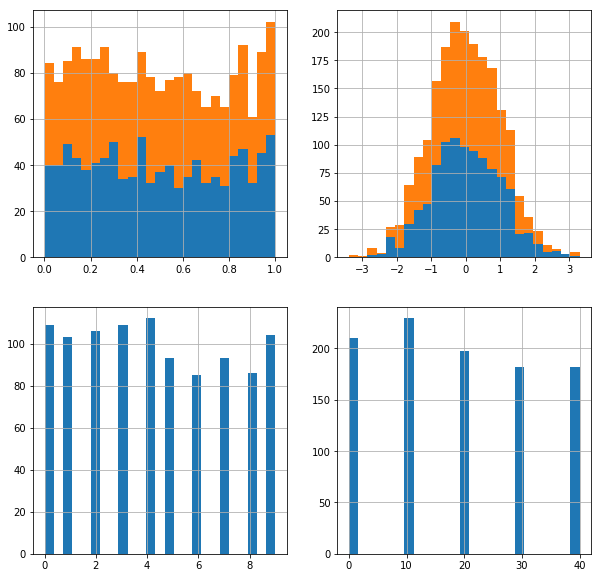

In [60]:
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

npr.rand(3, 2)
npr.rand(3, 2) * 2 + 2

size = 1000
rn1 = npr.rand(size,2)
#print(rn1)
rn2 = npr.randn(size,2)
#print(rn2)
rn3 = npr.randint(0, 10, size)
rang = [0, 10, 20, 30, 40]
rn4 = npr.choice(rang, size=size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

ax1.hist(rn1, bins = 25, stacked = True)
ax1.grid(True)

ax2.hist(rn2, bins = 25, stacked = True)
ax2.grid(True)

ax3.hist(rn3, bins = 25)
ax3.grid(True)

ax4.hist(rn4, bins = 25)
ax4.grid(True)

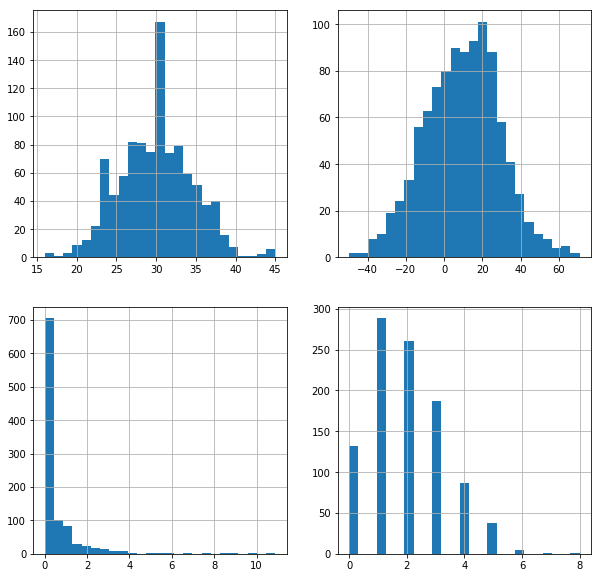

In [67]:
rn5 = npr.binomial(100, 0.3, size)
rn6 = npr.normal(10, 20, size)
rn7 = npr.chisquare(0.5, size)
rn8 = npr.poisson(2.0, size=size)
#print(rn8)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

ax1.hist(rn5, bins = 25)
ax1.grid(True)

ax2.hist(rn6, bins = 25)
ax2.grid(True)

ax3.hist(rn7, bins = 25)
ax3.grid(True)

ax4.hist(rn8, bins = 25)
ax4.grid(True)

In [152]:
import pandas as pd

# Series
obj = pd.Series([40, 12, -3, 25])
obj
obj[0]
obj.index
obj.values

# Series with index
obj2 = pd.Series([40, 12, -3, 25], index=['a', 'b', 'c', 'd'])
obj2
obj2['c']
obj2[obj2>15]
obj2.describe()
obj2.to_dict()

# DataFrame based on Series
d = {
    'one':pd.Series([40, 12, -3, 25], index=['a', 'b', 'c', 'd']),
    'two':pd.Series([40, 12, -3, 25], index=['a', 'b', 'c', 'd'])
}
df = pd.DataFrame(d)
df

# DataFrame Map
a = pd.read_csv('hcquant_closeprice.csv', encoding = 'gbk')
a
b = {1:'银行', 2:'房地产', 4:'医药生物', 5:'房地产', 6:'采掘', 7:'休闲服务', 8:'机械设备'}
a['ind'] = a.ticker.map(b)
a

# DataFrame Sort
data = pd.DataFrame(
    {
        'group': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
        'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6],
    }
)
data
data.sort_values(by=['group', 'ounces'], ascending=[False, True], inplace=True)
data

# Location
a.loc[:, ['ticker', 'closePrice']]
a.iloc[:4, [1,4]]
a.iloc[:4, 1:4]
#a.ix[:4, ['ticker', 'closePrice']] 弃用

# Filtering
a[a.closePrice > 10]
a[(a.closePrice>10) & (a.ticker>3)]
a[((a.closePrice>10)*1 + (a.ticker>3)*1)==1]
#a[(a.ticker>3)*1]

# Category
bins = [4,9,10,20,30]
cat = pd.cut(a.closePrice, bins)
cat
pd.value_counts(cat)
group_names = ['low', 'middle_1', 'middle_2', 'high']
pd.cut(a.closePrice, bins, labels = group_names)

# Groupby
df2 = pd.read_csv('20170930.csv', dtype={'ticker':str, 'holdingTicker':str}, encoding='gbk')
#pd.set_option("display.max_rows", 1000)
#df2.head()
df2[['holdingTicker']].groupby(df2['ticker']).count().tail()
df2[['holdingTicker']].groupby(df2['industryName1']).count().sort_values('holdingTicker', ascending=False)
df2[['marketValue']].groupby(df2['ticker']).sum().sort_values('marketValue', ascending=False).head()
def t_range(arr):
    return arr.max() - arr.min()
df2[['marketValue']].groupby(df2['ticker']).agg(t_range).head()
df2[['marketValue']].groupby(df2['ticker']).agg(['sum', 'max', t_range]).head()

TypeError: tuple indices must be integers or slices, not str

Text(0,0.5,'涨跌幅')

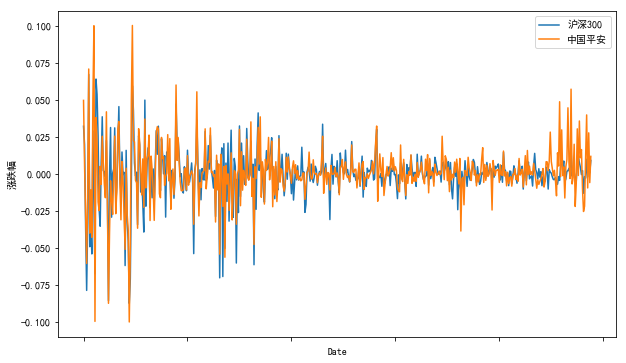

In [163]:
import datetime as dt

plt.rcParams['font.sans-serif'] = ['SimHei'] #正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #正常显示负号

data = pd.read_csv('hcquant_data.csv', index_col='Date')
#data.index = [dt.datetime.strptime(x, '%Y-%m-%d') for x in data.index]
#data
data.plot(figsize=(10,6))
plt.ylabel('涨跌幅')

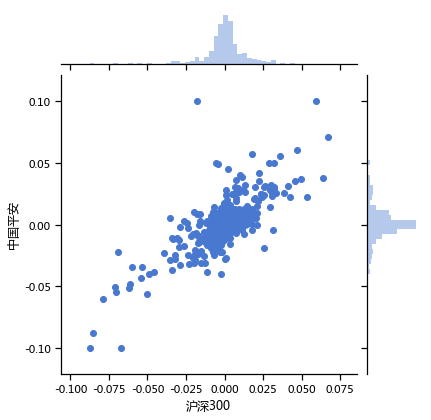

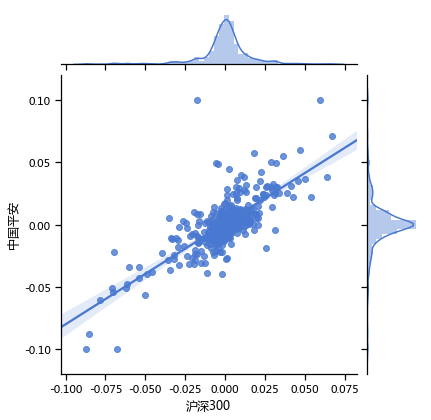

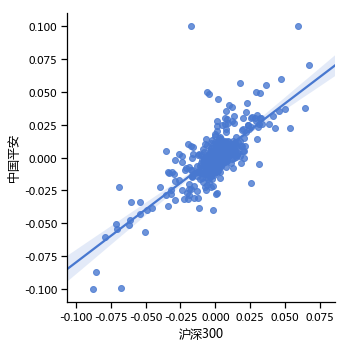

In [220]:
# Seaborn
import seaborn as sns

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

# jointplot
sns.jointplot(data['沪深300'], data['中国平安'])
sns.jointplot(data['沪深300'], data['中国平安'], kind='reg')

#lmplot
sns.lmplot('沪深300', '中国平安', data)

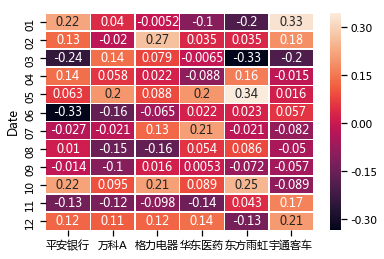

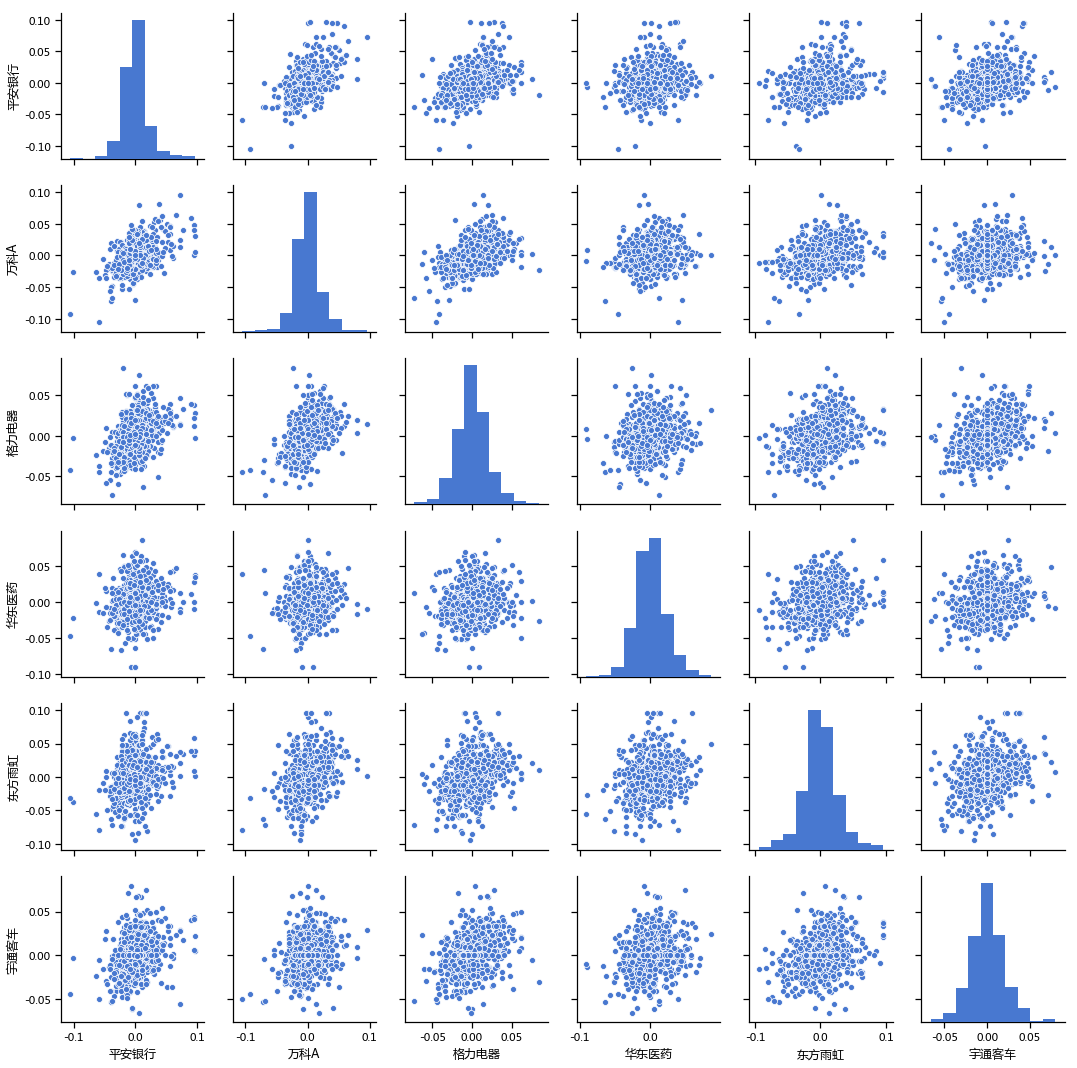

In [260]:
# Seaborn -- heapmap

data2 = pd.read_csv('hcquant_data2.csv', index_col='Date')
data2.head()
data2_rets = np.log(data2.pct_change()+1)
data2_rets.index = [str(x)[5:7] for x in data2_rets.index]
#data2_rets.index = [x[8:10] for x in data2_rets.index]
data2_rets.index.name = 'Date'
data2_group = data2_rets.groupby(['Date']).sum()
data2_group

sns.heatmap(data2_group, annot=True, linewidths=0.5)

# Seaborn -- Pairplot
sns.pairplot(data2_rets.dropna())

In [ ]:
.